In [340]:
import numpy as np
import matplotlib.pyplot as plt


In [341]:
tau = np.pi*2
radius = 1

In [342]:
def draw_segment(p1,p2):
    x1,x2 = p1[0], p2[0]
    y1,y2 = p1[1], p2[1]
    plt.plot([x1,x2],[y1,y2],'k-',color='red')

In [343]:
circle = plt.Circle((0, 0), radius, color='black', fill=False)

In [344]:
chords = []

for i in range(20):
    # generate random angles
    a1 = np.random.random() * tau
    a2 = np.random.random() * tau
    # generate points from angles
    p1 = (np.cos(a1),np.sin(a1))
    p2 = (np.cos(a2),np.sin(a2))
    chords.append((p1,p2))


C:\Users\Josh\AppData\Local\Temp\ipykernel_15912\1263615494.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([x1,x2],[y1,y2],'k-',color='red')


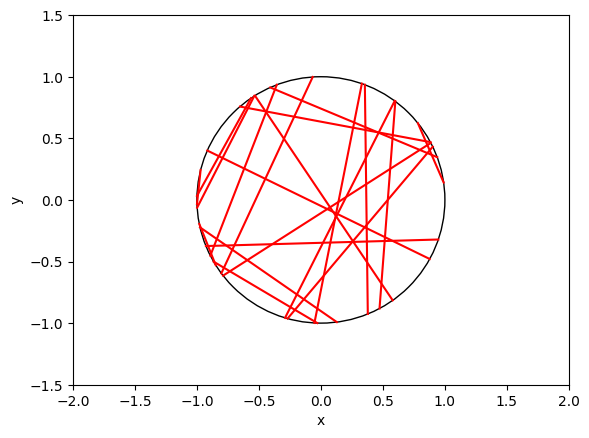

In [345]:
fig, ax = plt.subplots()
ax.set_xlabel('x'), ax.set_ylabel('y')
ax.set_xlim((-2,2)), ax.set_ylim((-1.5, 1.5))
ax.add_artist(circle)

for i in range(len(chords)):
    draw_segment(chords[i][0],chords[i][1])